In [1]:
!pip install torch torchvision transformers matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/199.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/199.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/199.4 MB 1.5 MB/s eta 0:02:11
   ---------------------------------------- 0.8/199.4 MB 1.3 MB/s eta 0:02:29
   ---------------------------------------- 1.0/199.4 MB 1.4 MB/s eta 0:02:23
   ---------------------------------------- 1.3/199.4 MB 1.4 MB/s eta 0:02:19
   ---------------------------------------- 1.6/199.4 MB 1.4 MB/s eta 0:02:17
   ---------------------------------------- 2.1/199.4 MB 1.5 MB/s eta 0:02:15
   ---------------------------------------- 2.4/199.4 MB 1.5 MB/s eta 0:02:11
    --------------------------------------- 2.6/199.4 MB 1.5 MB/s eta 0:02:13
    --------------------------------------- 3.1/199.4 MB 1.5 MB/s eta 0:02:09
    -------------------------

### Project Overview

* Perform sentimental analysis on social media posts using BERT(Bidirectional Encoder Representations from Transformers). We analyze each post (positive, negative, or neutral) using dataset, training a BERT model to classify the sentiments accurately.

### Imporing libraries and Configuring Dependencies

* Transformers: For BERT Tokenizer and model
* Pandas and Numpy for data manipulation
* Torch Pytorch library for deep learning
* Sklearn for model evaluation metrics

### Loading and Preprocessing Dataset

* load data with pandas and remove unnecessary cols
* We convert the target column to binary values for sentiment (0: Negative, 1: Positive)

In [29]:
import numpy as np
import pandas as pd

columns = ['target', 'ids', 'date', 'flag', 'user','text']
df1 = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', names=columns)

df = df1.sample(n=3000, random_state=42)



In [30]:
# Retain only necessary cols

df = df[['target', 'text']]


In [31]:
df.head()

,target,text
541200,0,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,@TiannaChaos i know just family drama. its la...
285055,0,School email won't open and I have geography ...
705995,0,upper airways problem


In [32]:
# Mapping target labels: 0 -> Negative, 4 -> Positive
df['target'] = df['target'].map({0:0, 4:1})

In [33]:
# Check dataset distribution

print(df['target'].value_counts())
print(df.head())

target
1    1513
0    1487
Name: count, dtype: int64
        target                                               text
541200       0             @chrishasboobs AHHH I HOPE YOUR OK!!! 
750          0  @misstoriblack cool , i have no tweet apps  fo...
766711       0  @TiannaChaos i know  just family drama. its la...
285055       0  School email won't open  and I have geography ...
705995       0                             upper airways problem 


### Observations

* Dataset contains text and sentiment columns
* Basic Stats reveal the distribution as positive, negative, and neutral sentiments
* Balanced Dataset

### Preprocessing 

* Text Cleaning: Removing URLs, mentions, and special characters
* Tokenization: BERT's tokenizer to convert text into tokens
* Padding and Truncation: Ensure Uniform sequence length
* Splitting: Divide data into training and testing subsets

In [34]:
import re
from transformers import BertTokenizer
import torch

# Loading the bert tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Clean text function
def clean_text(text):
    text = re.sub(r"http\S+", "", text) # Remove URLs
    text = re.sub(r"@\w+", "", text) # Remove mentions
    text = re.sub(r"#\w+", "", text) # Remove Hashtags
    text = re.sub(r"[^A-Za-z\s]", "", text) # Remove Special Characters

    return text.lower().strip()

C:\Users\Ahmed\miniconda3\envs\bert_env\lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [35]:
df["text"] = df["text"].apply(clean_text)

In [36]:
# tokenize and encode text using BERT Tokenizer

def tokenize_data(texts, labels, max_len=128):
    encodings=tokenizer(
        list(texts),
        truncation=True,
        padding=True,
        max_length=max_len,
        return_tensors = "pt"
    )
    labels = torch.tensor(labels.values)
    return encodings, labels




In [37]:
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(df["text"], df["target"], test_size=0.2, random_state=42)

train_encodings, train_labels = tokenize_data(train_texts, train_labels)
test_encodings, test_labels = tokenize_data(test_texts, test_labels)

### Define the model

* Use a pre-trained BERT model with a classification head

In [20]:
import torch
from transformers import BertForSequenceClassification

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


C:\Users\Ahmed\miniconda3\envs\bert_env\lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


In [21]:
# Loading BERT model

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model = model.to(device)

C:\Users\Ahmed\miniconda3\envs\bert_env\lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.hf.co/bert-base-uncased/68d45e234eb4a928074dfd868cead0219ab85354cc53d20e772753c6bb9169d3?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1733561948&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczMzU2MTk0OH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9iZXJ0LWJhc2UtdW5jYXNlZC82OGQ0NWUyMzRlYjRhOTI4MDc0ZGZkODY4Y2VhZDAyMTlhYjg1MzU0Y2M1M2QyMGU3NzI3NTNjNmJiOTE2OWQzP3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiJ9XX0_&Signature=KMag0BbZK7BE91JWz27c%7EFz4t3CMA4dij7OOShEFq6kuq0W6FpCixX6IDz%7EVc0gLgZouzmLSB--yizplhKJjqtEO9M6-rAI-iVRZQE6WtNyEzZVdDx2KfEiSqsynO9S8KeJAkW8148euVzq77YMDTOKrYAKa5vb6025CeFXU%7EA2IepwxEoVeIb1f-j2xj3AgAGyISsCKyPNQTPLjUdqoWy8OO0j%7EEiHE132QXiCu8GN8kKAn%7EADoGhvDMLD6D-Xyls1gXU6ZLfEyY707H3buBR-6HLordgvQbB9ieS2LfBCUm74Gf-NNoGPVWCsmclFKx4vq9kyewGnqIb6RKGTrdg__&Key-Pair-Id=K3RPWS32NSSJCE: HTTPSConnectionPool(host=

model.safetensors:  93%|#########2| 409M/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Training the model

* Use the tokenized data to train the BERT model
* Creating a custom Class for our Dataset
* Creating Data Loaders since we're using Pytorch
* Move model to appropriate device
* Define the optimizer (AdamW)
* Create the training loop with epochs, which will train the model and also display the loss
* tqdm is used to show progess of the code

In [38]:
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from tqdm import tqdm

# create custom dataset class
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key : val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

In [39]:
train_dataset = SentimentDataset(train_encodings, train_labels)
test_dataset = SentimentDataset(test_encodings, test_labels)

# Creating dataloaders as we're using Pytorch

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

In [40]:
# Move model to appropriate device
model = model.to(device)

In [41]:
# Optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

In [42]:
# Training Loop
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    loop = tqdm(train_loader, leave=True)

    for batch in loop:
        # Move data to appropriate device
        batch = {key: val.to(device) for key, val in batch.items()}

        # Forward Pass
        outputs = model(**batch)
        loss = outputs.loss
        total_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update progress bar
        loop.set_description(f"Epoch {epoch + 1}")
        loop.set_postfix(loss=loss.item())

    print(f"Epoch {epoch + 1} Loss: {total_loss / len(train_loader)}")

Epoch 1: 100%|███████████████████████████████████████████████████████████| 150/150 [18:06<00:00,  7.24s/it, loss=0.553]


Epoch 1 Loss: 0.5178608155250549


Epoch 2: 100%|███████████████████████████████████████████████████████████| 150/150 [17:32<00:00,  7.02s/it, loss=0.556]


Epoch 2 Loss: 0.2711653878291448


Epoch 3: 100%|███████████████████████████████████████████████████████| 150/150 [5:31:12<00:00, 132.49s/it, loss=0.0038]

Epoch 3 Loss: 0.0993164998300684


### Evaluate the Model

* Evaluate the model metrics like accuracy, precision, recall, and F1-Score.
* Confusion Matrix: To visualize model performance across classes.
* Classification Report: Shows precision, recall, and F1-Score per class.

In [46]:
!pip install seaborn

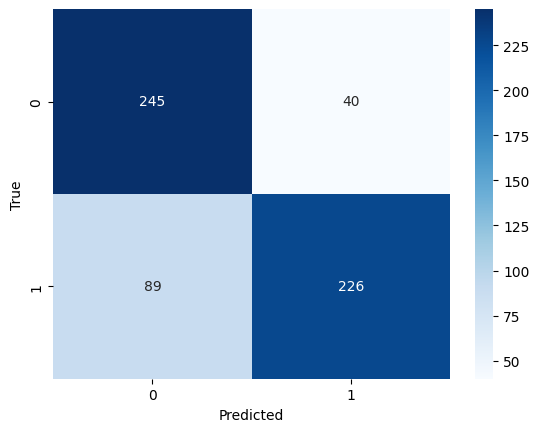

In [48]:
# from sklearn.metrics import classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns
# import torch

# # Evaluation Loop

# model.eval()
# all_preds = []
# all_labels = []

# with torch.no_grad():
#     for batch in test_loader:
#         # Move batch to appropriate device
#         batch = {key: val.to(device) for key, val in batch.items()}

#         # Forward pass
#         outputs = model(**batch)

#         # Predictions and Labels
#         preds = torch.argmax(outputs.logits, dim=1).cpu().numpy() # Move predictions to CPU for metrics

#         labels = batch['labels'].cpu().numpy() # Now move labels

#         all_preds.extend(preds)
#         all_labels.extend(labels)

# # Generate the classification report

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [49]:
print(classification_report(all_labels, all_preds))


              precision    recall  f1-score   support

           0       0.73      0.86      0.79       285
           1       0.85      0.72      0.78       315

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.78       600
weighted avg       0.79      0.79      0.78       600



### Findings

* High recall for positive and negative classes
* Some confusion netural sentiments, indicating a need for more balanced data

### Save Model and Deploy

In [50]:
model.save_pretrained("sentiment_model")
tokenizer.save_pretrained("sentiment_model")

('sentiment_model\\tokenizer_config.json',
 'sentiment_model\\special_tokens_map.json',
 'sentiment_model\\vocab.txt',
 'sentiment_model\\added_tokens.json')

In [51]:
!pip install fastapi uvicorn

  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 578.7 kB/s eta 0:00:03
   ---------- ----------------------------- 0.5/2.0 MB 578.7 kB/s eta 0:00:03
   --------------- ------------------------ 0.8/2.0 MB 644.9 kB/s eta 0:00:02
   --------------------- ------------------ 1.0/2.0 MB 708.5 kB/s eta 0:00:02
   -------------------------- ------------- 1.3/2.0 MB 737.4 kB/s eta 0:00:01
   ------------------------------- -------- 1.6/2.0 MB 783.9 kB/s eta 0:00:01
   ------------------------------- ------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires libclang>=13.0.0, which is not installed.
tensorflow 2.10.0 requires tensorflow-io-gcs-filesystem>=0.23.1, which is not installed.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


In [53]:
!pip install nest_asyncio

In [56]:
from fastapi import FastAPI
from pydantic import BaseModel
import nest_asyncio
from uvicorn import Config, Server
import torch
from transformers import BertForSequenceClassification, BertTokenizer

app = FastAPI()  # initializing FastAPI

# Load saved model
model = BertForSequenceClassification.from_pretrained("sentiment_model").to('cpu')
tokenizer = BertTokenizer.from_pretrained("sentiment_model")

# Define request structure
class SentimentRequest(BaseModel):
    text: str

@app.get("/")
def root():
    return {"message": "Welcome to the Sentiment Analysis API! Use POST /predict to analyze sentiment."}

@app.post("/predict")
def predict_sentiment(request: SentimentRequest):
    inputs = tokenizer(request.text, return_tensors="pt", truncation=True, padding=True, max_length=128).to("cpu")
    outputs = model(**inputs)
    sentiment = torch.argmax(outputs.logits).item()
    sentiment_label = "Positive" if sentiment == 1 else "Negative"
    return {"sentiment": sentiment_label}

# Allow the event loop to run inside Jupyter
nest_asyncio.apply()

# Run the FastAPI app
config = Config(app=app, host="127.0.0.1", port=8000, log_level="info")
server = Server(config)

# Start the server
server.run()


INFO:     Started server process [13580]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:5085 - "GET /predict HTTP/1.1" 405 Method Not Allowed
INFO:     127.0.0.1:5086 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:5530 - "GET /predict HTTP/1.1" 405 Method Not Allowed
INFO:     127.0.0.1:5826 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:5846 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:5848 - "POST /predict HTTP/1.1" 200 OK
INFO:     127.0.0.1:5850 - "POST /predict HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [13580]


KeyboardInterrupt: 